In [1]:
import cdsapi

In [10]:
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            '10m_u_component_of_wind'
        ],
        'year': '2019',
        'month': [
            '03',
        ],
        'day': [
            '01',
        ],
        'time': [
            '00:00', 
        ],
        'area': '-45/25/-62/45'
    },
    'download.nc')

2020-02-26 16:49:00,403 INFO Welcome to the CDS
2020-02-26 16:49:00,404 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2020-02-26 16:49:01,368 INFO Request is queued
2020-02-26 16:49:02,522 INFO Request is running
2020-02-26 16:49:06,566 INFO Request is completed
2020-02-26 16:49:06,567 INFO Downloading http://136.156.132.201/cache-compute-0004/cache/data6/adaptor.mars.internal-1582764541.6215482-31320-1-ee24cffa-42f0-4902-992d-ef6438dab33f.nc to download.nc (12.6K)
2020-02-26 16:49:06,851 INFO Download rate 44.3K/s


Result(content_length=12860,content_type=application/x-netcdf,location=http://136.156.132.201/cache-compute-0004/cache/data6/adaptor.mars.internal-1582764541.6215482-31320-1-ee24cffa-42f0-4902-992d-ef6438dab33f.nc)

In [8]:
import xarray as xr 
%matplotlib inline

In [11]:
ds = xr.load_dataset('download.nc')

In [12]:
ds


<xarray.Dataset>
Dimensions:    (latitude: 69, longitude: 81, time: 1)
Coordinates:
  * longitude  (longitude) float32 25.0 25.25 25.5 25.75 ... 44.5 44.75 45.0
  * latitude   (latitude) float32 -45.0 -45.25 -45.5 ... -61.5 -61.75 -62.0
  * time       (time) datetime64[ns] 2019-03-01
Data variables:
    u10        (time, latitude, longitude) float32 12.682791 ... -0.5682256
Attributes:
    Conventions:  CF-1.6
    history:      2020-02-27 00:49:03 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

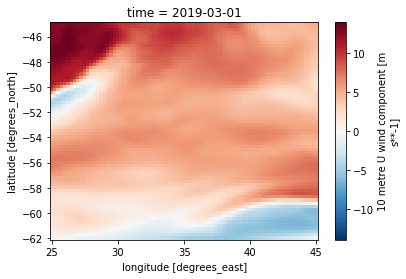

In [13]:
ds.u10.plot()